<a href="https://colab.research.google.com/github/naokityokoyama/NLP/blob/main/TF_IDF_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TF 
é a frequencia com que uma palavra aparece numa dada frase, com respeito ao tamanho desta frase. Com isso, TF basicamentecaptura a importancia de uma palavra, independentemente do tamanho da frase da qual ela faça parte
EX palavra com fequencia 8 com tamanho 20 e a mesma palavra de tamanho 8 mas com tamanho 200 no caso o TF vai dar mais impotancia para o 1 frase

## IDF
enquanto TF captura a importancia de uma palavra num doc especifico do conj de dados, o IDF mede a relevancia dessa mesma paralavra em todos os outros doc onde ela aparece

##TF-IDF 
equilobra o 'jogo' onde as palavras que aparecem menos são mais raras e com isso terão valores para se equilibrar com palabras que aparecem mais vezes

Em outras palavras TF IDF equilibra as palavras


In [1]:
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
texto = ['O ladrão foi visto roubando um banco', 'depois de roubar o banco, o ladrão saiu correndo', 'o ladrão foi visto descasnando no banco da praça']

vectorize = TfidfVectorizer()

vectorize.fit(texto)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [101]:
vocabulario = vectorize.vocabulary_
vocabulario

{'banco': 0,
 'correndo': 1,
 'da': 2,
 'de': 3,
 'depois': 4,
 'descasnando': 5,
 'foi': 6,
 'ladrão': 7,
 'no': 8,
 'praça': 9,
 'roubando': 10,
 'roubar': 11,
 'saiu': 12,
 'um': 13,
 'visto': 14}

In [231]:
pd.DataFrame(vocabulario.items(), index=vocabulario.values())

,0,1
7,ladrão,7
6,foi,6
14,visto,14
10,roubando,10
13,um,13
0,banco,0
4,depois,4
3,de,3
11,roubar,11
12,saiu,12


In [100]:
idf = vectorize.idf_

idf = pd.Series(idf)
idf

0     1.000000
1     1.693147
2     1.693147
3     1.693147
4     1.693147
5     1.693147
6     1.287682
7     1.000000
8     1.693147
9     1.693147
10    1.693147
11    1.693147
12    1.693147
13    1.693147
14    1.287682
dtype: float64

In [109]:
pd.DataFrame(list(vocabulario.keys(), 

TypeError: ignored

In [55]:
d = pd.DataFrame([vocabulario]).T


In [54]:
idf_frame = pd.DataFrame([idf]).T
idf_frame

,0
0,1.000000
1,1.693147
2,1.693147
3,1.693147
4,1.693147
5,1.693147
6,1.287682
7,1.000000
8,1.693147
9,1.693147


In [61]:
pd.concat([idf_frame, d])

,0
0,1.000000
1,1.693147
2,1.693147
3,1.693147
4,1.693147
5,1.693147
6,1.287682
7,1.000000
8,1.693147
9,1.693147


In [91]:
!pip install unidecode

     |████████████████████████████████| 245kB 5.7MB/s 


In [98]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode

In [99]:
train_df = pd.read_csv('/content/news_headlines.csv')
train_df.head(3)

,post,tags
0,após quentinhas e alimentação cortada vasco ac...,esporte
1,até os <digit><digit> dá para sonhar diz idoso...,educacao
2,brigadeiro da aprovação oração mãe e filha jun...,educacao


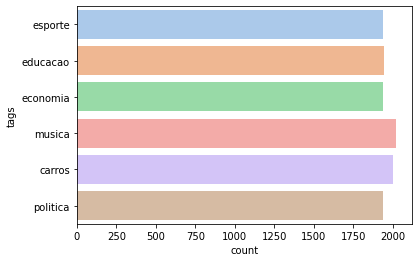

In [100]:
sns.countplot(y='tags', data=train_df, palette='pastel')

In [101]:
#Label Encoder
le = LabelEncoder()
y= le.fit_transform(train_df['tags'])

In [102]:
print (y)
print (le.classes_)

[3 2 2 ... 3 4 3]
['carros' 'economia' 'educacao' 'esporte' 'musica' 'politica']


In [103]:
X = train_df['post']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=5)

In [105]:
pipeline = Pipeline([
                     ('vectorizer', TfidfVectorizer()),
                     ('clf', LinearSVC())
])

In [106]:
pipeline.steps

[('vectorizer',
  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.float64'>, encoding='utf-8',
                  input='content', lowercase=True, max_df=1.0, max_features=None,
                  min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                  smooth_idf=True, stop_words=None, strip_accents=None,
                  sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, use_idf=True, vocabulary=None)),
 ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
            intercept_scaling=1, loss='squared_hinge', max_iter=1000,
            multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
            verbose=0))]

In [107]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

In [108]:
y_pred = pipeline.predict(X_test)



In [109]:
accuracy_score(y_test, y_pred)

0.9103653355989805

In [110]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       389
           1       0.81      0.80      0.80       396
           2       0.95      0.93      0.94       403
           3       0.94      0.94      0.94       393
           4       0.95      0.96      0.95       413
           5       0.87      0.88      0.87       360

    accuracy                           0.91      2354
   macro avg       0.91      0.91      0.91      2354
weighted avg       0.91      0.91      0.91      2354



In [111]:
le.classes_

array(['carros', 'economia', 'educacao', 'esporte', 'musica', 'politica'],
      dtype=object)

In [112]:
#noticia aleatoria

frase = 'Palmeiras marca um gol no final da partida'

predictian = pipeline.predict([frase])
predictian

array([3])

In [113]:
le.inverse_transform(predictian)

array(['esporte'], dtype=object)

In [114]:
#noticia aleatoria 2 

frase2 = 'Marron 5 inicia sua turnê pelo Brasil amanha'

predictian = pipeline.predict([frase2])

le.inverse_transform(predictian)[0]

'musica'

In [116]:
#expotando modelo

joblib.dump(pipeline, 'model.joblib')

['model.joblib']